In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def get_new_bandit(n):
    return np.random.normal(0, 1, n)

In [37]:
def multi_arm_test_bench_incremental(n = 10, num_runs = 2000, num_steps = 1000, eps = 0.1, non_st = False, fixed_step = False, alpha = 0.1):
    num_optimal = np.zeros([num_runs,num_steps])
    for i in range(0,num_runs):
        q_star_new = get_new_bandit(n)
        if non_st:
            q_star_new[:] = np.random.normal(0,1)
        a_star = np.argmax(q_star_new) 
        q = np.zeros(n)
        opt_act_count = 0
        action_counts = np.zeros(n)
        for j in range(0, num_steps):
            if non_st:
                q_star_new = q_star_new + np.random.normal(0, 0.01, n)
                a_star = np.argmax(q_star_new) 
            action = 0
            if np.random.uniform(0,1) < eps:
                action = np.random.randint(0,10)
            else:
                action = np.argmax(q)
            r = np.random.normal(q_star_new[action], 1)
            action_counts[action] = action_counts[action]+1
            if fixed_step:
                q[action] = q[action] + alpha*(r - q[action])
            else:
                q[action] = q[action] + (r - q[action])/action_counts[action]
            if action == a_star:
                opt_act_count = opt_act_count+1
            num_optimal[i][j] = opt_act_count/(j+1)
    return np.mean(num_optimal, axis = 0)

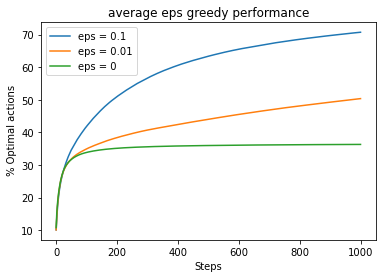

In [32]:
for e in [0.1, 0.01 ,0 ]:
    n_opt = multi_arm_test_bench_incremental(eps = e)*100
    plt.plot(n_opt, label = f'eps = {e}')
plt.title("average eps greedy performance")
plt.xlabel("Steps")
plt.ylabel(" % Optimal actions")
plt.legend()
plt.show()

In [42]:
#exercise 2.5

for e in [0.1]:
    n_opt = multi_arm_test_bench_incremental(eps = e, non_st=True, num_steps=10000)*100
    plt.plot(n_opt, label = f'eps = {e}')
plt.title("average eps greedy performance (non stationary, sample average) ")
plt.xlabel("Steps")
plt.ylabel(" % Optimal actions")
plt.legend()
plt.show()

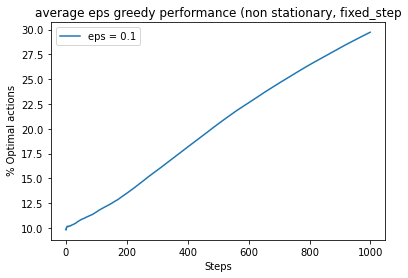

In [41]:
for e in [0.1]:
    n_opt = multi_arm_test_bench_incremental(num_steps = 10000, eps = e, non_st=True, fixed_step=True)*100
    plt.plot(n_opt, label = f'eps = {e}')
plt.title("average eps greedy performance (non stationary, fixed_step")
plt.xlabel("Steps")
plt.ylabel(" % Optimal actions")
plt.legend()
plt.show()